<a href="https://colab.research.google.com/github/furkangulec/Twitter-Duygu-Analizi/blob/main/twitter_duygu_analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kütüphaneler

In [ ]:
#Kütüphaneler
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd

import numpy as np
import re
import matplotlib.pyplot as plt
import datetime, time
plt.style.use('fivethirtyeight')


# Tweet Toplama İşlemleri (kullanılmasına gerek yok, veriler hazır)

In [ ]:
#Twitter API Bilgileri
consumerKey = 'CONSUMERKEY GİR'
consumerSecret = 'CONSUMER SECRET GİR'
accessToken = 'ACCESS TOKEN GİR'
accessTokenSecret = 'ACCESS TOKEN SECRET GİR'

In [ ]:
#Doğrulama nesnesi oluştur
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#AccessToken ve AccessTokenSecret ayarlama
authenticate.set_access_token(accessToken, accessTokenSecret)

#API Objesi oluştur
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
#3250 Tweet Toplama
number_of_tweets = 9999
tweets = []
likes = []
time = []
ids = []

posts = tweepy.Cursor(api.user_timeline, id="drfahrettinkoca", tweet_mode="extended").items(number_of_tweets)

for tweet in posts:
  tweets.append(tweet.full_text)
  likes.append(tweet.favorite_count)
  time.append(tweet.created_at)
  ids.append(tweet.id)

df = pd.DataFrame({'tweets':tweets, 'likes':likes, 'time':time, 'ids':ids})
df





,tweets,likes,time,ids
0,Doğru. Salgını gündemden çıkarmalıyız. Bunun m...,4336,2021-12-24 16:30:09,1474417119077019653
1,Bolu A.İ.B. Üniversitesi Eğitim ve Araştırma H...,5511,2021-12-23 18:06:00,1474078854293737477
2,Dün seri üretimine geçilen yerli aşı Turkovac’...,4781,2021-12-23 16:11:17,1474049985574490112
3,Türk Müziğinin büyük besteci ve icracılarından...,2811,2021-12-23 14:14:55,1474020698830028805
4,"SMA hastalığının önlenmesine yönelik, evlilik ...",11515,2021-12-23 07:03:30,1473912131519238147
...,...,...,...,...
3245,Bilim Kurulu Toplantımızın ardından COVID-19 (...,2466,2020-03-05 12:24:40,1235541738921635840
3246,"Singapur’da Koronavirüs tanısı konan yolcu, Fr...",23153,2020-03-05 11:39:37,1235530401684361217
3247,"Sevgili Büşra, senin biricik vicdanını, mesleğ...",113027,2020-03-04 19:41:18,1235289234824744964
3248,Sağlık sistemimize güç katacak yeni düzenlemel...,1508,2020-03-04 18:44:55,1235275045796302853


In [ ]:
#Fahrettin Koca'ya verilen cevaplar
name = 'drfahrettinkoca'

replies=[]
likes = []
time = []
ids = []
for tweet in tweepy.Cursor(api.search, q='to:'+name, result_type='recent', timeout=999999).items(3250):
  replies.append(tweet.text.replace('\n', ' '))
  likes.append(tweet.favorite_count)
  time.append(tweet.created_at)
  ids.append(tweet.id)

df = pd.DataFrame({'replies':replies, 'likes':likes, 'time':time, 'ids':ids})
df

In [ ]:
#Belli tarih aralığındaki cevapları alma
tweets = []
likes = []
time = []
ids = []
cevapverilen = []

name = 'drfahrettinkoca'

replies = tweepy.Cursor(api.search_30_day, query='to:'+name, fromDate='202112150001',  toDate='202112152359', environment_name='thesis30day').items(1000)


for reply in replies:
  tweets.append(reply.text.replace('\n', ' '))
  likes.append(reply.favorite_count)
  time.append(reply.created_at)
  ids.append(reply.id)
  cevapverilen.append(reply.in_reply_to_status_id_str)
  

df = pd.DataFrame({'tweets':tweets, 'likes':likes, 'time':time, 'ids':ids, 'cevapverilen':cevapverilen})
df

# Google Sheets İşlemleri (kullanılmasına gerek yok, veriler hazır)

In [ ]:
#Googler Sheets / Doğrulama
!pip install --upgrade --quiet gspread
from google.colab import auth

auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
#Googler Sheets / Kaydetme

from gspread_dataframe import get_as_dataframe, set_with_dataframe

sh = gc.create('Tweetler')
worksheet = gc.open('Tweetler').sheet1

set_with_dataframe(worksheet, df2)

# Çeviri İşlemleri (kullanılmasına gerek yok, veriler hazır)

In [ ]:
%%capture
!pip install git+https://github.com/neuml/txtai#egg=txtai[pipeline]

In [ ]:
%%capture
from txtai.pipeline import Translation
#Çeviri modeli oluşturma
translate = Translation()

In [ ]:
#Tweetleri İngilizceye çevirip ekrana yazdır
def tweetCevir(yazi):
  return translate(yazi, 'en')

df['englishtweets'] = df['tweets'].apply(tweetCevir)
df

# Dosya Yükleme ve Tweetleri Düzenleme

In [ ]:
#Google Colab'a veri yükleme
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
#Excel dosyasını dataframe'e atıp yazdırma
df = pd.read_excel('Tweetler.xlsx', sheet_name= 0)
df



,tweets,likes,time,ids,englishtweets
0,RT @RTErdogan: Kabine Toplantısı Sonrası Mille...,0,2021-12-20 16:47:23,1472971906668187656,RT @rterdogan: Shouting to Nation After Cabine...
1,"Bakanlığımız, belirlenmiş aşı takvimi üzerinde...",4027,2021-12-20 16:21:59,1472965515169705986,Our ministry informs us that our citizens over...
2,YAKALANARAK GÖZALTINA ALINDI! Didim Devlet Has...,8900,2021-12-19 21:58:44,1472687870456516612,Ceeded by catching up! In the Didim State Hosp...
3,Salgının sonuçlarının günlük tablodaki veriler...,3157,2021-12-19 16:17:12,1472601920426713097,We are in a period that the outlays cannot be ...
4,Didim Devlet Hastanesinde görevli hekime karşı...,11005,2021-12-19 15:43:09,1472593353724375040,"In Didim State Hospital, he was treated with s..."
...,...,...,...,...,...
19509,"RT @MsMervechan: @drfahrettinkoca Sayın Bakan,...",0,2021-12-21 01:50:47,1473108658816962564,"RT @msmervechan: @drfahrettinka Mr. Minister, ..."
19510,"RT @MsMervechan: @drfahrettinkoca Sayın Bakan,...",0,2021-12-21 01:42:12,1473106497747968005,"RT @msmervechan: @drfahrettinka Mr. Minister, ..."
19511,@drfahrettinkoca sayın Sağlık Bakanı bu yazıyı...,0,2021-12-21 01:28:05,1473102943180230663,@drfahrettinkoca Mr. Health Minister See this ...
19512,RT @SkyZeyn: @drfahrettinkoca https://t.co/7iX...,0,2021-12-21 00:20:38,1473085968894861316,RT @skyzeyn: @drfahrettinka https://t.co/7ixu2...


In [ ]:
#Excel dosyasını yanıtlar dataframe'ine atıp yazdırma
dfYanitlar = pd.read_excel('Yanitlar.xlsx', sheet_name= 0)
dfYanitlar

,tweets,likes,time,ids,englishtweets
0,"@drfahrettinkoca Sayin bakanimiz, ilk basta 2 ...",0,2021-12-21 16:33:53,1473330896849747975,"@drfahrettinkoca Sayin Minister, First Basta 2..."
1,@drfahrettinkoca Ben bir vatandaşım ve vatanda...,0,2021-12-21 16:01:29,1473322741201874954,@drfahrettinkoca I'm writing a citizen and a c...
2,@drfahrettinkoca Yalan söylüyor aşıların kulan...,0,2021-12-21 15:57:44,1473321798133555201,@drfahrettinkoca is lying in the vaccines of t...
3,@drfahrettinkoca @saglikbakanligi Günlerdir 18...,0,2021-12-21 15:43:21,1473318177362923527,@drfahrettinkoca @saglikbakanligi are days I c...
4,@drfahrettinkoca Ulan pust doğru verileri ver ...,0,2021-12-21 15:35:20,1473316160854761472,@drfahrettinkoca Ulan PUST PUST TRUE DATA KAHPE
...,...,...,...,...,...
16309,"RT @MsMervechan: @drfahrettinkoca Sayın Bakan,...",0,2021-12-21 01:50:47,1473108658816962564,"RT @msmervechan: @drfahrettinka Mr. Minister, ..."
16310,"RT @MsMervechan: @drfahrettinkoca Sayın Bakan,...",0,2021-12-21 01:42:12,1473106497747968005,"RT @msmervechan: @drfahrettinka Mr. Minister, ..."
16311,@drfahrettinkoca sayın Sağlık Bakanı bu yazıyı...,0,2021-12-21 01:28:05,1473102943180230663,@drfahrettinkoca Mr. Health Minister See this ...
16312,RT @SkyZeyn: @drfahrettinkoca https://t.co/7iX...,0,2021-12-21 00:20:38,1473085968894861316,RT @skyzeyn: @drfahrettinka https://t.co/7ixu2...


In [ ]:
#Excel dosyasını saglik bakani dataframe'ine atıp yazdırma
dfSaglikBakani = pd.read_excel('SaglikBakani.xlsx', sheet_name= 0)
dfSaglikBakani

,tweets,likes,time,ids,englishtweets
0,RT @RTErdogan: Kabine Toplantısı Sonrası Mille...,0,2021-12-20 16:47:23,1472971906668187656,RT @rterdogan: Shouting to Nation After Cabine...
1,"Bakanlığımız, belirlenmiş aşı takvimi üzerinde...",4027,2021-12-20 16:21:59,1472965515169705986,Our ministry informs us that our citizens over...
2,YAKALANARAK GÖZALTINA ALINDI! Didim Devlet Has...,8900,2021-12-19 21:58:44,1472687870456516612,Ceeded by catching up! In the Didim State Hosp...
3,Salgının sonuçlarının günlük tablodaki veriler...,3157,2021-12-19 16:17:12,1472601920426713097,We are in a period that the outlays cannot be ...
4,Didim Devlet Hastanesinde görevli hekime karşı...,11005,2021-12-19 15:43:09,1472593353724375040,"In Didim State Hospital, he was treated with s..."
...,...,...,...,...,...
3195,Hızlı yayılan bulaşıcı hastalıklara karşı başa...,78413,2020-03-11 12:56:09,1237723990858305536,Fastens the success of fast-radiating contagio...
3196,"Cumhurbaşkanımız Sayın @RTErdogan, bugünkü AK ...",7382,2020-03-11 11:29:29,1237702176899825664,Our President of our President @rterdogan star...
3197,"Bir veya birkaç vaka, salgın değildir. Durum s...",20771,2020-03-11 09:18:19,1237669168738193408,One or several cases are not epidemic. The sit...
3198,"Ülkemiz, olası vaka için tedbirlerini önceden ...",15955,2020-03-11 08:15:13,1237653291649183745,Our country had previously taken their measure...


In [ ]:
#Tweetlerden bahsetme, rt, link, hashtag gibi şeyleri çıkarma
def tweetDuzenle(yazi):
   yazi = re.sub(r'@[A-Za-z0-9]+', '', yazi) #mentionları kaldırma
   yazi = re.sub(r'#', '', yazi) #hashtag sembolünü kaldırma
   yazi = re.sub(r'RT[\s]+', '', yazi) #RT yazısını kaldırma
   yazi = re.sub(r'https?:\/\/\S+', '', yazi) #Linkleri kaldırma

   return yazi

df['englishtweets'] = df['englishtweets'].apply(tweetDuzenle)
##dfYanitlar['englishtweets'] = dfYanitlar['englishtweets'].apply(tweetDuzenle)
##dfSaglikBakani['englishtweets'] = dfSaglikBakani['englishtweets'].apply(tweetDuzenle)
df


    

,tweets,likes,time,ids,englishtweets,subjectivity,polarity,Analysis
0,RT @RTErdogan: Kabine Toplantısı Sonrası Mille...,0,2021-12-20 16:47:23,1472971906668187656,: Shouting to Nation After Cabinet Meeting,0.000000,0.000000,Nötr
1,"Bakanlığımız, belirlenmiş aşı takvimi üzerinde...",4027,2021-12-20 16:21:59,1472965515169705986,Our ministry informs us that our citizens over...,0.500000,0.500000,Pozitif
2,YAKALANARAK GÖZALTINA ALINDI! Didim Devlet Has...,8900,2021-12-19 21:58:44,1472687870456516612,Ceeded by catching up! In the Didim State Hosp...,0.838636,-0.178409,Negatif
3,Salgının sonuçlarının günlük tablodaki veriler...,3157,2021-12-19 16:17:12,1472601920426713097,We are in a period that the outlays cannot be ...,0.533333,0.022222,Pozitif
4,Didim Devlet Hastanesinde görevli hekime karşı...,11005,2021-12-19 15:43:09,1472593353724375040,"In Didim State Hospital, he was treated with s...",0.200000,0.200000,Pozitif
...,...,...,...,...,...,...,...,...
19509,"RT @MsMervechan: @drfahrettinkoca Sayın Bakan,...",0,2021-12-21 01:50:47,1473108658816962564,": Mr. Minister, we do not hear this style new...",0.434524,0.267857,Pozitif
19510,"RT @MsMervechan: @drfahrettinkoca Sayın Bakan,...",0,2021-12-21 01:42:12,1473106497747968005,": Mr. Minister, we do not hear this style new...",0.434524,0.267857,Pozitif
19511,@drfahrettinkoca sayın Sağlık Bakanı bu yazıyı...,0,2021-12-21 01:28:05,1473102943180230663,Mr. Health Minister See this article. If you ...,0.000000,0.000000,Nötr
19512,RT @SkyZeyn: @drfahrettinkoca https://t.co/7iX...,0,2021-12-21 00:20:38,1473085968894861316,:,0.000000,0.000000,Nötr


# Subjectivity & Polarity

In [ ]:
#Subjektifliği elde etme (subjectivity)
def getSubjectivity(yazi):
  return TextBlob(yazi).sentiment.subjectivity

#Polariteyi elde (polarity)
def getPolarity(yazi):
  return TextBlob(yazi).sentiment.polarity

#Subjectivity ve Polarity'yi dataframe üzerinde göster
df['subjectivity'] = df['englishtweets'].apply(getSubjectivity)
df['polarity'] = df['englishtweets'].apply(getPolarity)

##dfYanitlar['subjectivity'] = df['englishtweets'].apply(getSubjectivity)
##dfYanitlar['polarity'] = df['englishtweets'].apply(getPolarity)

##dfSaglikBakani['subjectivity'] = df['englishtweets'].apply(getSubjectivity)
##dfSaglikBakani['polarity'] = df['englishtweets'].apply(getPolarity)

df



,tweets,likes,time,ids,englishtweets,subjectivity,polarity,Analysis
0,RT @RTErdogan: Kabine Toplantısı Sonrası Mille...,0,2021-12-20 16:47:23,1472971906668187656,: Shouting to Nation After Cabinet Meeting,0.000000,0.000000,Nötr
1,"Bakanlığımız, belirlenmiş aşı takvimi üzerinde...",4027,2021-12-20 16:21:59,1472965515169705986,Our ministry informs us that our citizens over...,0.500000,0.500000,Pozitif
2,YAKALANARAK GÖZALTINA ALINDI! Didim Devlet Has...,8900,2021-12-19 21:58:44,1472687870456516612,Ceeded by catching up! In the Didim State Hosp...,0.838636,-0.178409,Negatif
3,Salgının sonuçlarının günlük tablodaki veriler...,3157,2021-12-19 16:17:12,1472601920426713097,We are in a period that the outlays cannot be ...,0.533333,0.022222,Pozitif
4,Didim Devlet Hastanesinde görevli hekime karşı...,11005,2021-12-19 15:43:09,1472593353724375040,"In Didim State Hospital, he was treated with s...",0.200000,0.200000,Pozitif
...,...,...,...,...,...,...,...,...
19509,"RT @MsMervechan: @drfahrettinkoca Sayın Bakan,...",0,2021-12-21 01:50:47,1473108658816962564,": Mr. Minister, we do not hear this style new...",0.434524,0.267857,Pozitif
19510,"RT @MsMervechan: @drfahrettinkoca Sayın Bakan,...",0,2021-12-21 01:42:12,1473106497747968005,": Mr. Minister, we do not hear this style new...",0.434524,0.267857,Pozitif
19511,@drfahrettinkoca sayın Sağlık Bakanı bu yazıyı...,0,2021-12-21 01:28:05,1473102943180230663,Mr. Health Minister See this article. If you ...,0.000000,0.000000,Nötr
19512,RT @SkyZeyn: @drfahrettinkoca https://t.co/7iX...,0,2021-12-21 00:20:38,1473085968894861316,:,0.000000,0.000000,Nötr


# Word Cloud

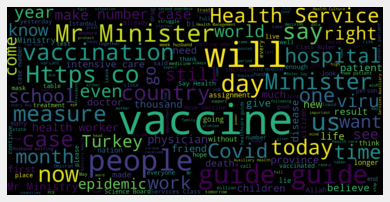

In [ ]:
#Word cloud oluşturma

tumKelimeler = ' '.join( [twts for twts in df['englishtweets']])
wordCloud = WordCloud(width = 1800, height=900, random_state = 21, max_font_size = 200).generate(tumKelimeler)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

# Negatif, Pozitif ve Nötr Tweetler

In [ ]:
# Negatif, Pozitif ve Nötr tweetleri hesaplama
#Tweet eğer polarity 0'dan düşükse negatif, 0 ise nötr, 0'dan yüksekse pozitif olarak hesaplanacak
def getAnalysis(deger):
  if deger < 0:
    return 'Negatif'
  elif deger == 0:
    return 'Nötr'
  else:
    return 'Pozitif'


##dfYanitlar['Analysis'] = dfYanitlar['polarity'].apply(getAnalysis)
##dfSaglikBakani['Analysis'] = dfSaglikBakani['polarity'].apply(getAnalysis)
df['Analysis'] = df['polarity'].apply(getAnalysis)

df


,tweets,likes,time,ids,englishtweets,subjectivity,polarity,Analysis
0,"@drfahrettinkoca Sayin bakanimiz, ilk basta 2 ...",0,2021-12-21 16:33:53,1473330896849747975,"Sayin Minister, First Basta 2 Sinovac, Write ...",0.000000,0.000000,Nötr
1,@drfahrettinkoca Ben bir vatandaşım ve vatanda...,0,2021-12-21 16:01:29,1473322741201874954,I'm writing a citizen and a citizenship gorev...,0.500000,0.500000,Pozitif
2,@drfahrettinkoca Yalan söylüyor aşıların kulan...,0,2021-12-21 15:57:44,1473321798133555201,is lying in the vaccines of the vaccines.,0.838636,-0.178409,Negatif
3,@drfahrettinkoca @saglikbakanligi Günlerdir 18...,0,2021-12-21 15:43:21,1473318177362923527,are days I can't reach 182 How do I have an ...,0.533333,0.022222,Pozitif
4,@drfahrettinkoca Ulan pust doğru verileri ver ...,0,2021-12-21 15:35:20,1473316160854761472,Ulan PUST PUST TRUE DATA KAHPE,0.200000,0.200000,Pozitif
...,...,...,...,...,...,...,...,...
16309,"RT @MsMervechan: @drfahrettinkoca Sayın Bakan,...",0,2021-12-21 01:50:47,1473108658816962564,": Mr. Minister, we do not hear this style new...",0.000000,0.000000,Nötr
16310,"RT @MsMervechan: @drfahrettinkoca Sayın Bakan,...",0,2021-12-21 01:42:12,1473106497747968005,": Mr. Minister, we do not hear this style new...",0.000000,0.000000,Nötr
16311,@drfahrettinkoca sayın Sağlık Bakanı bu yazıyı...,0,2021-12-21 01:28:05,1473102943180230663,Mr. Health Minister See this article. If you ...,0.000000,0.000000,Nötr
16312,RT @SkyZeyn: @drfahrettinkoca https://t.co/7iX...,0,2021-12-21 00:20:38,1473085968894861316,:,0.000000,0.000000,Nötr


In [ ]:
#Pozitif tweetleri yazdır
j=1
sortedDF = df.sort_values(by = ['polarity'])
for i in range(0, sortedDF.shape[0]):
  if( sortedDF['Analysis'][i] == 'Pozitif'):
    print(str(j) + ')  ' + sortedDF['englishtweets'][i])
    print()
    j = j + 1

  

In [ ]:
#Negatif tweetleri yazdır
j=1
sortedDF = df.sort_values(by = ['polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if( sortedDF['Analysis'][i] == 'Negatif'):
    print(str(j) + ')  ' + sortedDF['englishtweets'][i])
    print()
    j = j + 1


In [ ]:
#Nötr tweetleri yazdır
j=1
sortedDF = df.sort_values(by = ['polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if( sortedDF['Analysis'][i] == 'Nötr'):
    print(str(j) + ')  ' + sortedDF['englishtweets'][i])
    print()
    j = j + 1

In [ ]:
# Pozitif tweetlerin yüzdesini al
ptweets = df[df.Analysis == 'Pozitif']
ptweets = ptweets['englishtweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

29.3

In [ ]:
# Negatif tweetlerin yüzdesini al
ntweets = df[df.Analysis == 'Negatif']
ntweets = ntweets['englishtweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

14.1

In [ ]:
# Nötr tweetlerin yüzdesini al
ntweets = df[df.Analysis == 'Nötr']
ntweets = ntweets['englishtweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

56.6

# Harita

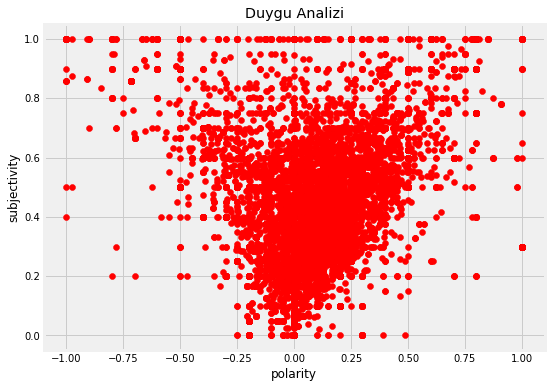

In [ ]:
#Polarity ve Subjectivity haritasını çıkar
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['polarity'][i], df['subjectivity'][i], color='Red')
  

plt.title('Duygu Analizi')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

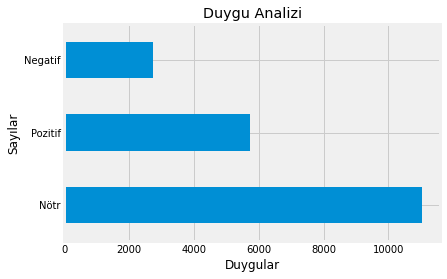

In [ ]:
#Değer sayısını hesaplama
df['Analysis'].value_counts()

#Değerleri görselleştir
plt.title('Duygu Analizi')
plt.xlabel('Duygular')
plt.ylabel('Sayılar')


df['Analysis'].value_counts().plot(kind = 'barh')
plt.show()

Text(0.5, 0.93, 'Duygu Analizi')

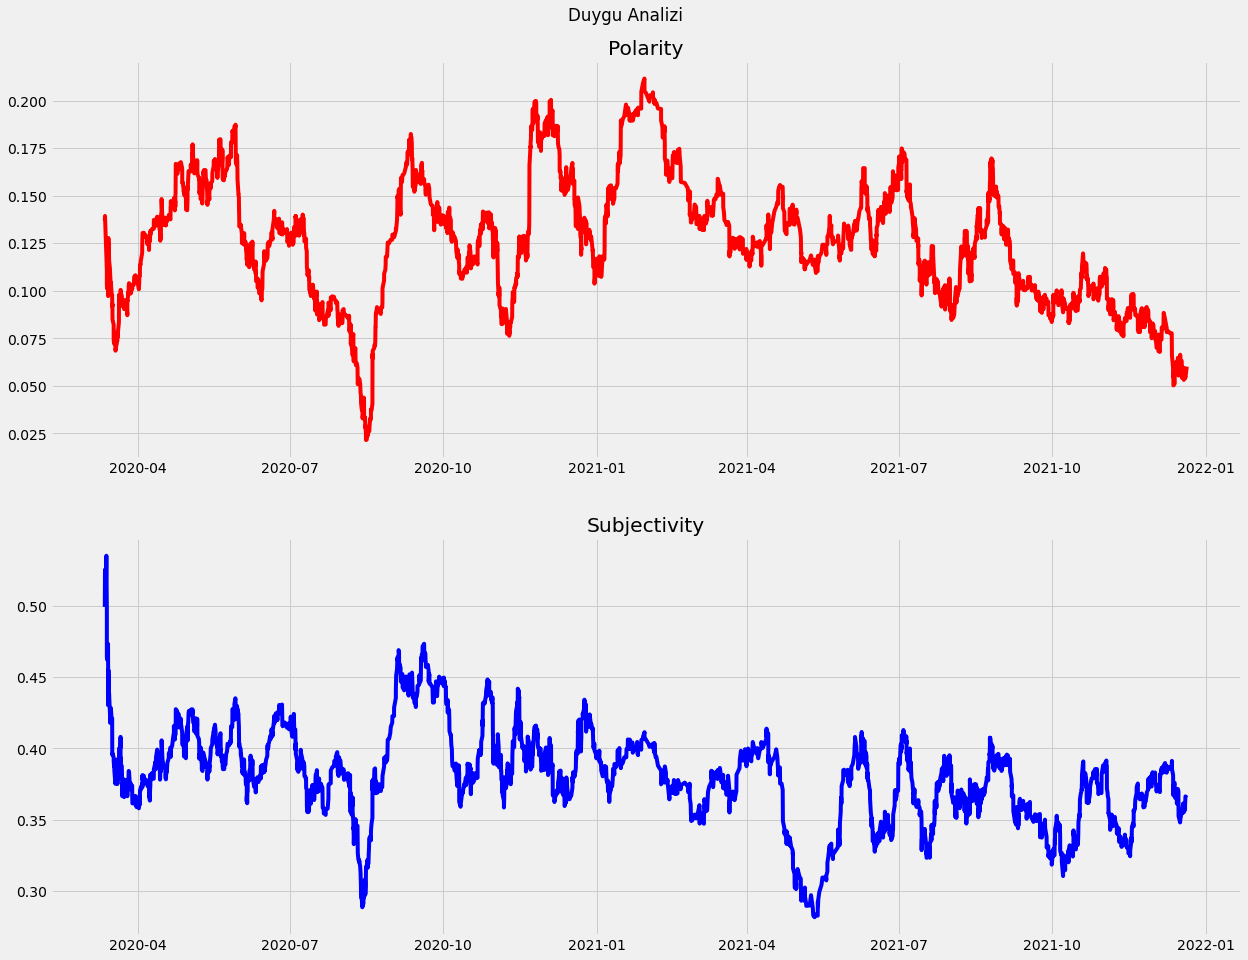

In [ ]:
##SAĞLIK BAKANI GRAFİK
dfSaglikBakani = dfSaglikBakani.sort_values(by = 'time', ascending=True)
dfSaglikBakani['MA Polarity'] = dfSaglikBakani.polarity.rolling(100, min_periods=10).mean()
dfSaglikBakani['MA Subjectivity'] = dfSaglikBakani.subjectivity.rolling(100, min_periods=10).mean()

fig, axes = plt.subplots(2,1, figsize=(19,15))
axes[0].plot(dfSaglikBakani['time'], dfSaglikBakani['MA Polarity'], color='Red')
axes[1].plot(dfSaglikBakani['time'], dfSaglikBakani['MA Subjectivity'], color='Blue')
axes[0].set_title('Polarity')
axes[1].set_title('Subjectivity')
fig.suptitle('Duygu Analizi', y=0.93)


# Yedek kodlar

In [ ]:
# Twitter kullanıcısından 100 tweet çıkar
posts = api.user_timeline(screen_name = "drfahrettinkoca", count=100, language = "en", tweet_mode="extended")

# 5 tweeti yazdır
print("Son 5 tweet'i yazdır: \n")
i = 1
for tweet in posts[0:100]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i = i + 1

Son 5 tweet'i yazdır: 

1) RT @RTErdogan: Kabine Toplantısı Sonrası Millete Sesleniş https://t.co/lfsE61XoZS

2) Bakanlığımız, belirlenmiş aşı takvimi üzerinden 3 aydan uzun süre geçmiş olan vatandaşlarımızı hatırlatma dozunu yaptırmaları için telefon mesajıyla doğrudan bilgilendirmektedir. HATIRLATMA DOZU zamanı gelenler aşılarını hemen yaptırsınlar. VAKTİNDE YAPILAN AŞI DAHA ÇOK KORUR. https://t.co/mqT95vUm5B

3) YAKALANARAK GÖZALTINA ALINDI! Didim Devlet Hastanesinde görevli hekime şiddet uygulayan kişi, kamera kayıtları ve yeni deliller üzerine dün yakalanarak gözaltına alındı. Bu önemli gelişmeyi basın açıklamasıyla kamuoyuna duyuran Söke Cumhuriyet Başsavcılığı’na teşekkür ediyoruz.

4) Salgının sonuçlarının günlük tablodaki verilerle ölçülemeyeceği bir dönemdeyiz. Hayatın tamamını etkileyen Covid-19’un sağlık dışı etkileri zaten öngörülüyordu. Toplumca bize düşen, bu kritik mücadelenin hayatı savunmak anlamına geldiğini bilip, salgın şartlarını hızla aşmaktır. https://t.co/AU8hq